---
**Export of unprocessed features**

---

In [11]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import random
import pickle
from scipy import sparse
import math
import pprint

import sklearn as sk 

import torch

from IPython.display import display

from toolbox import *
# from myMLtoolbox import *

%matplotlib inline
sns.set()
sns.set_context("notebook")

In [2]:
sns.set(rc={'figure.figsize':(14,6)})

In [3]:
cfg = load_cfg()

logVersions = load_LogVersions()

---
**For figures**

In [12]:
from figures_toolbox import *

In [13]:
mpl.rcParams.update(mpl.rcParamsDefault)

sns.set(
    context='paper',
    style='ticks',
)

%matplotlib inline

In [14]:
mpl.rcParams.update(performancePlot_style)

# Get uniprot list of proteins

In [4]:
uniprotIDs = pd.read_csv(
        os.path.join(cfg['rawDataUniProt'], 
                     "uniprot_allProteins_Human_v{}.pkl".format(logVersions['UniProt']['rawData'])),
        header=None,
        names=['uniprotID']
    )
glance(uniprotIDs)

DataFrame: 20,386 rows 	 1 columns


,uniprotID
0,A0A024RBG1
1,A0A075B6H7
2,A0A075B6H8
3,A0A075B6H9
4,A0A075B6I0


## Hubs

In [5]:
path0 = os.path.join(
    cfg['outputPreprocessingIntAct'], 
    "listHubs_20p_v{}.pkl".format(logVersions['IntAct']['preprocessed']['all'])
)

with open(path0, 'rb') as f:
    list_hubs20 = pickle.load(f)

glance(list_hubs20)

list: len 3240
['P42858', 'Q9NRI5', 'A8MQ03', 'P05067', 'P62993']


# Load feature datasets

In [6]:
featuresDict = {
    'bioProcessUniprot': {
        'path': os.path.join(
            cfg['outputPreprocessingUniprot'], 
            "bioProcessUniprot_v{}--{}.pkl".format(logVersions['UniProt']['rawData'], logVersions['UniProt']['preprocessed'])
        ),
        'imputeNA': '0', # '0', 'mean', 'none'
        'normalise':False,
        'isBinary': True,
    },
    'cellCompUniprot': {
        'path': os.path.join(
            cfg['outputPreprocessingUniprot'], 
            "cellCompUniprot_v{}--{}.pkl".format(logVersions['UniProt']['rawData'], logVersions['UniProt']['preprocessed'])
        ),
        'imputeNA': '0',
        'normalise':False,
        'isBinary': True,
    },
    'molFuncUniprot': {
        'path': os.path.join(
            cfg['outputPreprocessingUniprot'], 
            "molFuncUniprot_v{}--{}.pkl".format(logVersions['UniProt']['rawData'], logVersions['UniProt']['preprocessed'])
        ),
        'imputeNA': '0',
        'normalise':False,
        'isBinary': True,
    },
    'domainUniprot': {
        'path': os.path.join(
            cfg['outputPreprocessingUniprot'], 
            "domainFT_v{}--{}.pkl".format(logVersions['UniProt']['rawData'], logVersions['UniProt']['preprocessed'])
        ),
        'imputeNA': '0',
        'normalise':False,
        'isBinary': True,
    },
    'motifUniprot': {
        'path': os.path.join(
            cfg['outputPreprocessingUniprot'], 
            "motif_v{}--{}.pkl".format(logVersions['UniProt']['rawData'], logVersions['UniProt']['preprocessed'])
        ),
        'imputeNA': '0',
        'normalise':False,
        'isBinary': True,
    },
    'Bgee': {
        'path': os.path.join(
            cfg['outputPreprocessingBgee'],
            "Bgee_processed_v{}.pkl".format(logVersions['Bgee']['preprocessed'])
        ),
        'imputeNA': '0',
        'normalise':True,
        'isBinary': False,
    },
    'tissueCellHPA': {
        'path': os.path.join(
            cfg['outputPreprocessingHPA'], 
            "tissueIHC_tissueCell_v{}.pkl".format(logVersions['HPA']['preprocessed']['tissueIHC_tissueCell'])
        ),
        'imputeNA': '0',
        'normalise':True,
        'isBinary': False,
    },
    'tissueHPA': {
        'path': os.path.join(
            cfg['outputPreprocessingHPA'], 
            "tissueIHC_tissueOnly_v{}.pkl".format(logVersions['HPA']['preprocessed']['tissueIHC_tissueOnly'])
        ),
        'imputeNA': '0',
        'normalise':True,
        'isBinary': False,
    },
    'RNAseqHPA': {
        'path': os.path.join(
            cfg['outputPreprocessingHPA'], 
            "consensusRNAseq_v{}.pkl".format(logVersions['HPA']['preprocessed']['consensusRNAseq'])
        ),
        'imputeNA': 'mean',
        'normalise':True,
        'isBinary': False,
    },
    'subcellularLocationHPA': {
        'path': os.path.join(
            cfg['outputPreprocessingHPA'], 
            "subcellularLocation_v{}.pkl".format(logVersions['HPA']['preprocessed']['subcellularLocation'])
        ),
        'imputeNA': '0',
        'normalise':False,
        'isBinary': True,
    },
    'sequence': {
        'path': os.path.join(
            cfg['outputPreprocessingUniprot'], 
            "sequenceData_v{}--{}.pkl".format(logVersions['UniProt']['rawData'], logVersions['UniProt']['preprocessed'])
        ),
        'imputeNA':'none',
        'normalise':False,
        'isBinary': False,
    }
}

In [7]:
def sneakPeak(featuresDict):
    for feature, details in featuresDict.items():
        df = pd.read_pickle(details['path'])
        print('## ',feature)
        glance(df)
        print()

In [8]:
sneakPeak(featuresDict)

##  bioProcessUniprot
DataFrame: 20,386 rows 	 12,249 columns


,0000002,0000003,0000012,0000017,0000018,0000019,0000022,0000023,0000027,0000028,...,2001287,2001288,2001294,2001295,2001301,2001302,2001303,2001306,2001311,uniprotID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A024RBG1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6I0



##  cellCompUniprot
DataFrame: 20,386 rows 	 1,755 columns


,0000015,0000109,0000110,0000111,0000112,0000118,0000120,0000123,0000124,0000125,...,1990876,1990879,1990904,1990907,1990909,1990913,1990917,1990923,1990971,uniprotID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A024RBG1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6I0



##  molFuncUniprot
DataFrame: 20,386 rows 	 4,347 columns


,0000009,0000010,0000014,0000016,0000026,0000030,0000033,0000035,0000036,0000048,...,1990932,1990935,1990939,1990948,1990955,1990984,2001065,2001069,2001070,uniprotID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A024RBG1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6I0



##  domainUniprot
DataFrame: 20,386 rows 	 2,314 columns


,10,11,12,2Fe2Sferredoxintype,2SPRY,2SPRY1,2SPRY2,2SPRY3,3ligatedtype,4Fe4SHis,...,tSNAREcoiledcoilhomology2,trtypeG,truncated,uDENN,uDENNC9ORF72type,uDENNFLCNSMCR8type,uDENNFNIP12type,vSNAREcoiledcoilhomology,xRRM,uniprotID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A024RBG1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6I0



##  motifUniprot
DataFrame: 20,386 rows 	 820 columns


,2SPRYdomainbindingmotif,4EHPbindingmotif,4Smotif,4motif,9aaTAD,9aaTAD1,9aaTAD2,AAASmotif,AAD,ABS2,...,requiredforinteractionwithCTTN,requiredforinteractionwithHSC20,requiredforinteractionwithMAPRE1,requiredforinteractionwithSLC9A3R1,requiredforpropernuclearlocalization,signalforcargopackagingintoCOPIIcoatedvesicles,toFYN,toLCP2,xCxx,uniprotID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A024RBG1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6H9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A075B6I0



##  Bgee
DataFrame: 19,090 rows 	 1,148 columns


,Ammon's horn 2-5 year-old child stage (human),Ammon's horn 25-44 year-old human stage (human),Ammon's horn 65-79 year-old human stage (human),Ammon's horn 80 year-old and over human stage (human),Ammon's horn adolescent stage (human),Ammon's horn human adult stage (human),Ammon's horn human aged stage,Ammon's horn human late adulthood stage (human),Ammon's horn human middle aged stage (human),Ammon's horn life cycle,...,visceral pleura young adult stage (human),zone of skin 25-44 year-old human stage (human),zone of skin adolescent stage (human),zone of skin human adult stage (human),zone of skin human middle aged stage (human),zone of skin late embryonic stage,zone of skin life cycle,zone of skin post-juvenile adult stage,zone of skin young adult stage (human),uniprotID
0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,O43657
1,0.0,-2.0,-2.0,-2.0,-1.0,1.0,0.0,1.0,1.0,1.0,...,-1.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,Q9H2S6
2,0.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,O60762
3,0.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,Q8IZE3
4,0.0,1.0,1.0,0.0,-1.0,2.0,0.0,2.0,2.0,2.0,...,-1.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,1.0,Q9NSG2



##  tissueCellHPA
DataFrame: 10,850 rows 	 190 columns


,uniprotID,adipose tissue adipocytes,adrenal gland cells in zona fasciculata,adrenal gland cells in zona glomerulosa,adrenal gland cells in zona reticularis,adrenal gland glandular cells,adrenal gland medullary cells,appendix glandular cells,appendix lymphoid tissue,bone marrow hematopoietic cells,...,testis sertoli cells,testis spermatogonia cells,thymus cortical cells,thymus medullary cells,thyroid gland glandular cells,tonsil germinal center cells,tonsil non-germinal center cells,tonsil squamous epithelial cells,urinary bladder urothelial cells,vagina squamous epithelial cells
0,A0A024RBG1,2.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,1.0
1,A0A087WVF3,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,...,1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
2,A0A087WXS9,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,...,1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,A0A087X179,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,...,1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,A0A087X1G2,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,...,1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0



##  tissueHPA
DataFrame: 10,850 rows 	 63 columns


,uniprotID,adipose tissue,adrenal gland,appendix,bone marrow,breast,bronchus,cartilage,caudate,cerebellum,...,spleen,stomach 1,stomach 2,substantia nigra,testis,thymus,thyroid gland,tonsil,urinary bladder,vagina
0,A0A024RBG1,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,...,1.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,1.0
1,A0A087WVF3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,0.0,3.0,0.0,-1.0,-1.0,1.0,-1.0
2,A0A087WXS9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,0.0,3.0,0.0,-1.0,-1.0,-1.0,-1.0
3,A0A087X179,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,0.0,3.0,0.0,-1.0,-1.0,-1.0,-1.0
4,A0A087X1G2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,0.0,3.0,0.0,-1.0,-1.0,-1.0,-1.0



##  RNAseqHPA
DataFrame: 18,938 rows 	 62 columns


,uniprotID,B-cells,NK-cells,T-cells,adipose tissue,adrenal gland,amygdala,appendix,basal ganglia,bone marrow,...,stomach,testis,thalamus,thymus,thyroid gland,tongue,tonsil,total PBMC,urinary bladder,vagina
0,A0A024RBG1,0.0,0.2,0.6,0.5,1.2,0.0,0.0,0.0,5.4,...,0.1,1.6,0.0,0.0,1.7,0.0,0.1,0.4,5.8,0.0
1,A0A075B759,1.7,3.4,2.9,0.0,0.4,0.0,0.0,0.0,2.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
2,A0A075B767,0.4,0.3,1.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.3,0.0,0.0,0.0,0.0,0.5,0.3,0.0,0.0
3,A0A087WTH1,3.7,6.9,4.3,1.2,0.6,0.3,4.8,0.4,1.2,...,6.1,1.4,0.2,2.3,8.7,18.8,6.3,1.7,6.3,2.0
4,A0A087WTH5,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0



##  subcellularLocationHPA
DataFrame: 12,566 rows 	 34 columns


,0000776,0001650,0005654,0005694,0005730,0005739,0005764,0005768,0005777,0005783,...,0032154,0034451,0036464,0043231,0045111,0045171,0072686,0090543,1990752,uniprotID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A024RBG1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A0A087WUL8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,A0A087WVF3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,A0A087WXS9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,A0A087X179



##  sequence
DataFrame: 20,386 rows 	 2 columns


,uniprotID,sequence
0,A0A024RBG1,MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...
1,A0A075B6H7,MEAPAQLLFLLLLWLPDTTREIVMTQSPPTLSLSPGERVTLSCRAS...
2,A0A075B6H8,MDMRVPAQLLGLLLLWLPGVRFDIQMTQSPSFLSASVGDRVSIICW...
3,A0A075B6H9,MAWTPLLFLTLLLHCTGSLSQLVLTQSPSASASLGASVKLTCTLSS...
4,A0A075B6I0,MSVPTMAWMMLLLGLLAYGSGVDSQTVVTQEPSFSVSPGGTVTLTC...


# EDA

**Number of GO terms for hubs and lone proteins**

In [16]:
def count_GOterms():
    countGO = uniprotIDs.copy()
    
    for feature, details in featuresDict.items(): 
        print(feature)
        if feature != 'sequence':
            df = pd.read_pickle(details['path'])

            foo = df.set_index('uniprotID').ne(0).sum(axis=1)
            foo2 = pd.DataFrame(foo)
            foo2.columns = [feature]
            foo2.reset_index()
            
            countGO = countGO.join(foo2, on='uniprotID', how='left')
    
    return countGO


In [17]:
countGO = count_GOterms()
glance(countGO)

bioProcessUniprot
cellCompUniprot
molFuncUniprot
domainUniprot
motifUniprot
Bgee
tissueCellHPA
tissueHPA
RNAseqHPA
subcellularLocationHPA
sequence
DataFrame: 20,386 rows 	 11 columns


,uniprotID,bioProcessUniprot,cellCompUniprot,molFuncUniprot,domainUniprot,motifUniprot,Bgee,tissueCellHPA,tissueHPA,RNAseqHPA,subcellularLocationHPA
0,A0A024RBG1,4,3,9,1,1,1024.0,77.0,48.0,34.0,1.0
1,A0A075B6H7,2,3,0,1,0,494.0,NaN,NaN,NaN,NaN
2,A0A075B6H8,2,3,0,1,0,494.0,NaN,NaN,NaN,NaN
3,A0A075B6H9,2,3,0,1,0,494.0,NaN,NaN,NaN,NaN
4,A0A075B6I0,2,3,0,1,0,494.0,NaN,NaN,NaN,NaN


In [18]:
countGO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20386 entries, 0 to 20385
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uniprotID               20386 non-null  object 
 1   bioProcessUniprot       20386 non-null  int64  
 2   cellCompUniprot         20386 non-null  int64  
 3   molFuncUniprot          20386 non-null  int64  
 4   domainUniprot           20386 non-null  int64  
 5   motifUniprot            20386 non-null  int64  
 6   Bgee                    19090 non-null  float64
 7   tissueCellHPA           10850 non-null  float64
 8   tissueHPA               10850 non-null  float64
 9   RNAseqHPA               18938 non-null  float64
 10  subcellularLocationHPA  12566 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.7+ MB


In [19]:
countGO['isHub'] = countGO.uniprotID.isin(list_hubs20)

glance(countGO)

DataFrame: 20,386 rows 	 12 columns


,uniprotID,bioProcessUniprot,cellCompUniprot,molFuncUniprot,domainUniprot,motifUniprot,Bgee,tissueCellHPA,tissueHPA,RNAseqHPA,subcellularLocationHPA,isHub
0,A0A024RBG1,4,3,9,1,1,1024.0,77.0,48.0,34.0,1.0,False
1,A0A075B6H7,2,3,0,1,0,494.0,NaN,NaN,NaN,NaN,False
2,A0A075B6H8,2,3,0,1,0,494.0,NaN,NaN,NaN,NaN,False
3,A0A075B6H9,2,3,0,1,0,494.0,NaN,NaN,NaN,NaN,False
4,A0A075B6I0,2,3,0,1,0,494.0,NaN,NaN,NaN,NaN,False


/home/ll582/.conda/envs/PPI-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/ll582/.conda/envs/PPI-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/ll582/.conda/envs/PPI-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


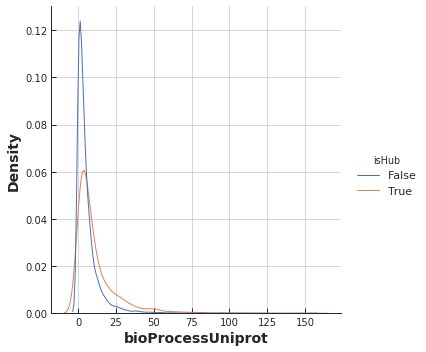

In [20]:
sns.displot(countGO, x="bioProcessUniprot", hue="isHub", kind='kde', common_norm=False);

In [21]:
doPlot=False

for feature in featuresDict.keys():
    if feature != 'sequence':
        foo = countGO.loc[countGO.isHub][feature]
        bar = countGO.loc[~countGO.isHub][feature]
        
        print(f"{feature}: on average, hubs have {foo.mean():.2f} GO terms, non-hubs have {bar.mean():.2f} (medians {foo.median():.2f} vs {bar.median():.2f})")
        if doPlot:
            sns.displot(countGO, x=feature, hue="isHub", kind='kde', common_norm=False)
            plt.show();

bioProcessUniprot: on average, hubs have 11.54 GO terms, non-hubs have 5.72 (medians 6.00 vs 3.00)
cellCompUniprot: on average, hubs have 6.11 GO terms, non-hubs have 3.60 (medians 5.00 vs 3.00)
molFuncUniprot: on average, hubs have 4.19 GO terms, non-hubs have 2.49 (medians 3.00 vs 2.00)
domainUniprot: on average, hubs have 1.09 GO terms, non-hubs have 1.00 (medians 0.00 vs 0.00)
motifUniprot: on average, hubs have 0.28 GO terms, non-hubs have 0.16 (medians 0.00 vs 0.00)
Bgee: on average, hubs have 937.01 GO terms, non-hubs have 876.51 (medians 993.00 vs 940.00)
tissueCellHPA: on average, hubs have 85.08 GO terms, non-hubs have 84.32 (medians 83.00 vs 82.00)
tissueHPA: on average, hubs have 48.73 GO terms, non-hubs have 48.71 (medians 49.00 vs 49.00)
RNAseqHPA: on average, hubs have 56.54 GO terms, non-hubs have 52.39 (medians 61.00 vs 60.00)
subcellularLocationHPA: on average, hubs have 1.78 GO terms, non-hubs have 1.75 (medians 2.00 vs 2.00)


# Export vectors lengths

In [25]:
def getVectorsLengths(featuresDict):
    
    vectorsLengths = dict()
    
    for feature, details in featuresDict.items():
        df = pd.read_pickle(details['path'])
        
        assert 'uniprotID' in df.columns
        
        vectorsLengths[feature] = df.shape[1]-1 # -1 to remove uniprotID
        
    return vectorsLengths

In [26]:
vectorsLengths = getVectorsLengths(featuresDict)
print(vectorsLengths)

{'bioProcessUniprot': 12248, 'cellCompUniprot': 1754, 'molFuncUniprot': 4346, 'domainUniprot': 2313, 'motifUniprot': 819, 'Bgee': 1147, 'tissueCellHPA': 189, 'tissueHPA': 62, 'RNAseqHPA': 61, 'subcellularLocationHPA': 33, 'sequence': 1}


In [27]:
versionRawImpute_overall = '6-0'

logVersions['featuresEngineering']['longVectors']['overall'] = versionRawImpute_overall

dump_LogVersions(logVersions)

In [28]:
with open(os.path.join(
    cfg['outputFeaturesEngineering'],
    "longVectors_lengths_v{}.pkl".format(versionRawImpute_overall)
), 'wb') as f:
    pickle.dump(vectorsLengths, f)

# Format long vectors

In [29]:
def formatRawData(featuresDict, uniprotIDs, vectorsLengths):
    
    out = dict()
    
    out['uniprotID'] = uniprotIDs.uniprotID.to_list()
    
    for feature, details in featuresDict.items():
        print(feature)
        df = pd.read_pickle(details['path'])
        print(' - initial dim:', df.shape)
        
        print(' - merge with reference index list')
        df = uniprotIDs.merge(
            df,
            on = 'uniprotID',
            how='left',
            validate='1:1'
        )
        df.set_index('uniprotID', inplace=True)
        print(' - new dim:', df.shape)
        
        assert details['imputeNA'] in ['0','mean','none']
        if details['imputeNA'] == 'mean':
            print(' - mean imputation')
            meanValues = df.mean(axis = 0, skipna = True)
            meanValues[np.isnan(meanValues)] = 0

            df.fillna(meanValues, inplace=True)

            # sanity check
            assert df.isna().sum().sum() == 0
        elif details['imputeNA'] == '0':
            print(' - imputate with 0')
            df.fillna(0, inplace=True)

            # sanity check
            assert df.isna().sum().sum() == 0
        else:
            print(' - no imputation: {:,} NAs'.format(df.isna().sum().sum()))
            
        if details['normalise']:
            print(' - normalise')
            scal = sk.preprocessing.StandardScaler(copy = False)
            df = scal.fit_transform(df)
        elif feature == 'sequence':
            df = df.sequence.to_list()
        else:
            df = df.values
            
        # compare shape to vectorsLengths
        if feature == 'sequence':
            assert isinstance(df, list)
        else:
            assert df.shape[1] == vectorsLengths[feature]
            
        out[feature] = df.copy()
        
    return out

In [30]:
def sneakPeak2(featuresDict, n=5):
    for feature, df in featuresDict.items():
        print('## ',feature)
        glance(df, n=n)
        print()

## Without normalising binary features

In [31]:
for feature in featuresDict:
    if featuresDict[feature]['isBinary']:
        featuresDict[feature]['normalise'] = False
        
featuresDict

{'bioProcessUniprot': {'path': '/rds/user/ll582/hpc-work/PPIdata/output/1_preprocessing/UniProt/bioProcessUniprot_v3-4--2-0.pkl',
  'imputeNA': '0',
  'normalise': False,
  'isBinary': True},
 'cellCompUniprot': {'path': '/rds/user/ll582/hpc-work/PPIdata/output/1_preprocessing/UniProt/cellCompUniprot_v3-4--2-0.pkl',
  'imputeNA': '0',
  'normalise': False,
  'isBinary': True},
 'molFuncUniprot': {'path': '/rds/user/ll582/hpc-work/PPIdata/output/1_preprocessing/UniProt/molFuncUniprot_v3-4--2-0.pkl',
  'imputeNA': '0',
  'normalise': False,
  'isBinary': True},
 'domainUniprot': {'path': '/rds/user/ll582/hpc-work/PPIdata/output/1_preprocessing/UniProt/domainFT_v3-4--2-0.pkl',
  'imputeNA': '0',
  'normalise': False,
  'isBinary': True},
 'motifUniprot': {'path': '/rds/user/ll582/hpc-work/PPIdata/output/1_preprocessing/UniProt/motif_v3-4--2-0.pkl',
  'imputeNA': '0',
  'normalise': False,
  'isBinary': True},
 'Bgee': {'path': '/rds/user/ll582/hpc-work/PPIdata/output/1_preprocessing/Bgee/

In [32]:
outDict = formatRawData(featuresDict=featuresDict, uniprotIDs=uniprotIDs, vectorsLengths=vectorsLengths)

bioProcessUniprot
 - initial dim: (20386, 12249)
 - merge with reference index list
 - new dim: (20386, 12248)
 - imputate with 0
cellCompUniprot
 - initial dim: (20386, 1755)
 - merge with reference index list
 - new dim: (20386, 1754)
 - imputate with 0
molFuncUniprot
 - initial dim: (20386, 4347)
 - merge with reference index list
 - new dim: (20386, 4346)
 - imputate with 0
domainUniprot
 - initial dim: (20386, 2314)
 - merge with reference index list
 - new dim: (20386, 2313)
 - imputate with 0
motifUniprot
 - initial dim: (20386, 820)
 - merge with reference index list
 - new dim: (20386, 819)
 - imputate with 0
Bgee
 - initial dim: (19090, 1148)
 - merge with reference index list
 - new dim: (20386, 1147)
 - imputate with 0
 - normalise
tissueCellHPA
 - initial dim: (10850, 190)
 - merge with reference index list
 - new dim: (20386, 189)
 - imputate with 0
 - normalise
tissueHPA
 - initial dim: (10850, 63)
 - merge with reference index list
 - new dim: (20386, 62)
 - imputate wi

In [33]:
sneakPeak2(outDict)

##  uniprotID
list: len 20386
['A0A024RBG1', 'A0A075B6H7', 'A0A075B6H8', 'A0A075B6H9', 'A0A075B6I0']

##  bioProcessUniprot
np.array: shape (20386, 12248)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

##  cellCompUniprot
np.array: shape (20386, 1754)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

##  molFuncUniprot
np.array: shape (20386, 4346)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

##  domainUniprot
np.array: shape (20386, 2313)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

##  motifUniprot
np.array: shape (20386, 819)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

##  Bgee
np.array: shape (20386, 1147)

[[

In [34]:
sneakPeak2(outDict, n=0)

##  uniprotID
list: len 20386

##  bioProcessUniprot
np.array: shape (20386, 12248)


##  cellCompUniprot
np.array: shape (20386, 1754)


##  molFuncUniprot
np.array: shape (20386, 4346)


##  domainUniprot
np.array: shape (20386, 2313)


##  motifUniprot
np.array: shape (20386, 819)


##  Bgee
np.array: shape (20386, 1147)


##  tissueCellHPA
np.array: shape (20386, 189)


##  tissueHPA
np.array: shape (20386, 62)


##  RNAseqHPA
np.array: shape (20386, 61)


##  subcellularLocationHPA
np.array: shape (20386, 33)


##  sequence
list: len 20386



---
**Export**
- v6.1 09/11/2021

In [36]:
versionRawLimitedImpute = '6-1'

# logVersions['featuresEngineering'] = dict()
# logVersions['featuresEngineering']['longVectors']=dict()
logVersions['featuresEngineering']['longVectors']['keepBinary'] = versionRawLimitedImpute

dump_LogVersions(logVersions)

In [37]:
with open(os.path.join(
    cfg['outputFeaturesEngineering'],
    "longVectors_keepBinary_v{}.pkl".format(versionRawLimitedImpute)
), 'wb') as f:
    pickle.dump(outDict, f)

## WITH normalising binary features

In [38]:
for feature in featuresDict:
    if featuresDict[feature]['isBinary']:
        featuresDict[feature]['normalise'] = True
        
featuresDict

{'bioProcessUniprot': {'path': '/rds/user/ll582/hpc-work/PPIdata/output/1_preprocessing/UniProt/bioProcessUniprot_v3-4--2-0.pkl',
  'imputeNA': '0',
  'normalise': True,
  'isBinary': True},
 'cellCompUniprot': {'path': '/rds/user/ll582/hpc-work/PPIdata/output/1_preprocessing/UniProt/cellCompUniprot_v3-4--2-0.pkl',
  'imputeNA': '0',
  'normalise': True,
  'isBinary': True},
 'molFuncUniprot': {'path': '/rds/user/ll582/hpc-work/PPIdata/output/1_preprocessing/UniProt/molFuncUniprot_v3-4--2-0.pkl',
  'imputeNA': '0',
  'normalise': True,
  'isBinary': True},
 'domainUniprot': {'path': '/rds/user/ll582/hpc-work/PPIdata/output/1_preprocessing/UniProt/domainFT_v3-4--2-0.pkl',
  'imputeNA': '0',
  'normalise': True,
  'isBinary': True},
 'motifUniprot': {'path': '/rds/user/ll582/hpc-work/PPIdata/output/1_preprocessing/UniProt/motif_v3-4--2-0.pkl',
  'imputeNA': '0',
  'normalise': True,
  'isBinary': True},
 'Bgee': {'path': '/rds/user/ll582/hpc-work/PPIdata/output/1_preprocessing/Bgee/Bgee_

In [39]:
outDict2 = formatRawData(featuresDict=featuresDict, uniprotIDs=uniprotIDs, vectorsLengths=vectorsLengths)

bioProcessUniprot
 - initial dim: (20386, 12249)
 - merge with reference index list
 - new dim: (20386, 12248)
 - imputate with 0
 - normalise
cellCompUniprot
 - initial dim: (20386, 1755)
 - merge with reference index list
 - new dim: (20386, 1754)
 - imputate with 0
 - normalise
molFuncUniprot
 - initial dim: (20386, 4347)
 - merge with reference index list
 - new dim: (20386, 4346)
 - imputate with 0
 - normalise
domainUniprot
 - initial dim: (20386, 2314)
 - merge with reference index list
 - new dim: (20386, 2313)
 - imputate with 0
 - normalise
motifUniprot
 - initial dim: (20386, 820)
 - merge with reference index list
 - new dim: (20386, 819)
 - imputate with 0
 - normalise
Bgee
 - initial dim: (19090, 1148)
 - merge with reference index list
 - new dim: (20386, 1147)
 - imputate with 0
 - normalise
tissueCellHPA
 - initial dim: (10850, 190)
 - merge with reference index list
 - new dim: (20386, 189)
 - imputate with 0
 - normalise
tissueHPA
 - initial dim: (10850, 63)
 - merge

In [40]:
sneakPeak2(outDict2)

##  uniprotID
list: len 20386
['A0A024RBG1', 'A0A075B6H7', 'A0A075B6H8', 'A0A075B6H9', 'A0A075B6I0']

##  bioProcessUniprot
np.array: shape (20386, 12248)

[[-0.02323526 -0.01400898 -0.02215341 ... -0.01213184 -0.00700398
  -0.00990536]
 [-0.02323526 -0.01400898 -0.02215341 ... -0.01213184 -0.00700398
  -0.00990536]
 [-0.02323526 -0.01400898 -0.02215341 ... -0.01213184 -0.00700398
  -0.00990536]
 ...
 [-0.02323526 -0.01400898 -0.02215341 ... -0.01213184 -0.00700398
  -0.00990536]
 [-0.02323526 -0.01400898 -0.02215341 ... -0.01213184 -0.00700398
  -0.00990536]
 [-0.02323526 -0.01400898 -0.02215341 ... -0.01213184 -0.00700398
  -0.00990536]]

##  cellCompUniprot
np.array: shape (20386, 1754)

[[-0.01400898 -0.01715827 -0.01213184 ... -0.00700398 -0.01213184
  -0.00700398]
 [-0.01400898 -0.01715827 -0.01213184 ... -0.00700398 -0.01213184
  -0.00700398]
 [-0.01400898 -0.01715827 -0.01213184 ... -0.00700398 -0.01213184
  -0.00700398]
 ...
 [-0.01400898 -0.01715827 -0.01213184 ... -0.0070039

---
**Export**
- v6.1 09/11/2021

In [41]:
versionRawImputeAll = '6-1'

logVersions['featuresEngineering']['longVectors']['imputeAll'] = versionRawImputeAll

dump_LogVersions(logVersions)

In [42]:
with open(os.path.join(
    cfg['outputFeaturesEngineering'],
    "longVectors_imputeAll_v{}.pkl".format(versionRawImputeAll)
), 'wb') as f:
    pickle.dump(outDict, f)